In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

c:\ProgramData\anaconda3\envs\ml-dev\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Explore the data

In [2]:
data = pd.read_csv('data/Hotel_Reviews.csv')
print(f"Dataset shape: {data.shape}")

Dataset shape: (515738, 17)


In [3]:
data.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [4]:
#Column names
print(f"Feature name : {data.columns.values}")

Feature name : ['Hotel_Address' 'Additional_Number_of_Scoring' 'Review_Date'
 'Average_Score' 'Hotel_Name' 'Reviewer_Nationality' 'Negative_Review'
 'Review_Total_Negative_Word_Counts' 'Total_Number_of_Reviews'
 'Positive_Review' 'Review_Total_Positive_Word_Counts'
 'Total_Number_of_Reviews_Reviewer_Has_Given' 'Reviewer_Score' 'Tags'
 'days_since_review' 'lat' 'lng']


In [5]:
#Check for null values
data.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

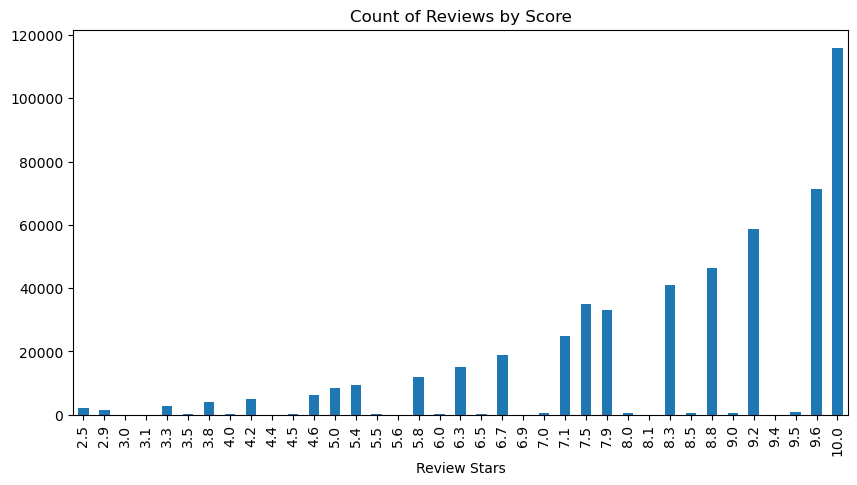

In [6]:
ax = data['Reviewer_Score'].value_counts().sort_index(ascending=True) \
    .plot(kind='bar',title="Count of Reviews by Score", figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [7]:
#data[data['lat'].isna()==True]

In [8]:
# we will drop the null record
#data.dropna(inplace=True)

In [9]:
print(f"Dataset shape after dropping null values: {data.shape}")

Dataset shape after dropping null values: (515738, 17)


In [10]:
# Total number of hotels being reviewed in this dataset
print(f"{data.Hotel_Name.unique().shape}")

(1492,)


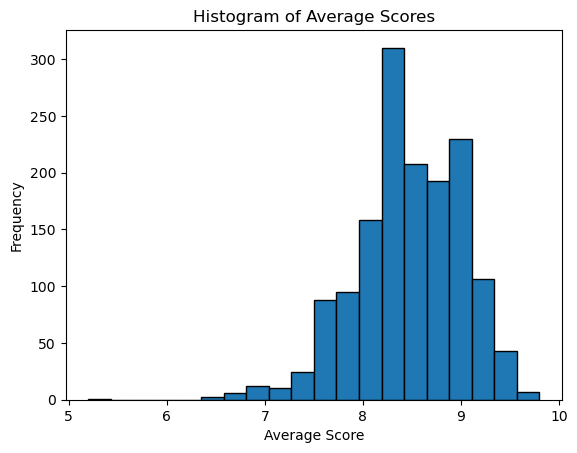

In [11]:
#As a quick exploration of data, we plot the number of hotels versus their average rating:
data_plot = data[["Hotel_Name", "Average_Score"]].drop_duplicates()

# Plotting the histogram
plt.hist(data_plot["Average_Score"], bins=20, edgecolor='black')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.title('Histogram of Average Scores')
plt.show()

Its show that most rating are between 7.5 and 9.5

## Natural Language Processing - Tokenize the reviews and build a bag-of-words model
The first goal is to do sentiment analysis on the positive and negative reviews. To do this, we need to first tokenize the words using nltk, remove the stopwords, and build a bag-of-words model.

In [12]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sagar_adhikari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
pos_reviews = data.Positive_Review
neg_reviews = data.Negative_Review
pos_reviews

0          Only the park outside of the hotel was beauti...
1          No real complaints the hotel was great great ...
2          Location was good and staff were ok It is cut...
3          Great location in nice surroundings the bar a...
4           Amazing location and building Romantic setting 
                                ...                        
515733                                             location
515734        Breakfast was ok and we got earlier check in 
515735                                          No Positive
515736     The rooms are enormous and really comfortable...
515737                                 staff was very kind 
Name: Positive_Review, Length: 515738, dtype: object

In [14]:
pos_reviews_words = nltk.word_tokenize(pos_reviews[1]) 
len(pos_reviews[1])

611

In [15]:
print(pos_reviews[1])
print(pos_reviews_words)

 No real complaints the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one Bit confusing Secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great Aside from those minor minor things fantastic spot and will be back when i return to Amsterdam 
['No', 'real', 'complaints', 'the', 'hotel', 'was', 'great', 'great', 'location', 'surroundings', 'rooms', 'amenities', 'and', 'service', 'Two', 'recommendations', 'however', 'firstly', 'the', 'staff', 'upon', 'check', 'in', 'are', 'very', 'confusing', 'regarding', 'deposit', 'payments', 'and', 'the', 'staff', 'offer', 'you', 'upon', 'checkout', 'to', 'refund', 'your', 'original', 'pay

In [16]:
pos_reviews_wordslist = []  
#for i in range(5):
for i in range(515738): #get error if put len+1 here, needed to switch from pos_reviews[1] to .iloc[1]
    pos_reviews_wordslist.append(nltk.word_tokenize(pos_reviews.iloc[i])) #tokenize text in each positive review

In [17]:
print(pos_reviews_wordslist[:5])

[['Only', 'the', 'park', 'outside', 'of', 'the', 'hotel', 'was', 'beautiful'], ['No', 'real', 'complaints', 'the', 'hotel', 'was', 'great', 'great', 'location', 'surroundings', 'rooms', 'amenities', 'and', 'service', 'Two', 'recommendations', 'however', 'firstly', 'the', 'staff', 'upon', 'check', 'in', 'are', 'very', 'confusing', 'regarding', 'deposit', 'payments', 'and', 'the', 'staff', 'offer', 'you', 'upon', 'checkout', 'to', 'refund', 'your', 'original', 'payment', 'and', 'you', 'can', 'make', 'a', 'new', 'one', 'Bit', 'confusing', 'Secondly', 'the', 'on', 'site', 'restaurant', 'is', 'a', 'bit', 'lacking', 'very', 'well', 'thought', 'out', 'and', 'excellent', 'quality', 'food', 'for', 'anyone', 'of', 'a', 'vegetarian', 'or', 'vegan', 'background', 'but', 'even', 'a', 'wrap', 'or', 'toasted', 'sandwich', 'option', 'would', 'be', 'great', 'Aside', 'from', 'those', 'minor', 'minor', 'things', 'fantastic', 'spot', 'and', 'will', 'be', 'back', 'when', 'i', 'return', 'to', 'Amsterdam'], 

In [18]:
len(pos_reviews_wordslist)

515738

In [19]:
neg_reviews_wordslist = [] #repeat tokenization for negative reviews
#for i in range(5):
for i in range(515738): #get error if put len+1 here, needed to switch from pos_reviews[1] to .iloc[1]
    neg_reviews_wordslist.append(nltk.word_tokenize(neg_reviews.iloc[i])) #tokenize text in each negative review as alist, append that to original list
#    return pos_reviews_wordslist as a nested list with each review as a sublist

In [20]:
print(neg_reviews_wordslist[-5:])

[['no', 'trolly', 'or', 'staff', 'to', 'help', 'you', 'take', 'the', 'luggage', 'to', 'the', 'room'], ['The', 'hotel', 'looks', 'like', '3', 'but', 'surely', 'not', '4'], ['The', 'ac', 'was', 'useless', 'It', 'was', 'a', 'hot', 'week', 'in', 'vienna', 'and', 'it', 'only', 'gave', 'more', 'hot', 'air'], ['No', 'Negative'], ['I', 'was', 'in', '3rd', 'floor', 'It', 'didn', 't', 'work', 'Free', 'Wife']]


In [21]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagar_adhikari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
len(nltk.corpus.stopwords.words("english")) #all the reviews in this dataset are in English

179

In [23]:
nltk.corpus.stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [24]:
useless_words = nltk.corpus.stopwords.words("english")
type(useless_words)

list

In [25]:
def build_bag_of_words_filtered(words):
    return {
        #word:1 for word in words
        word:1 for word in words \
        if not word in useless_words} 

In [26]:
assert len(build_bag_of_words_filtered(["what", "the"]))==0, "Make sure we are filtering out stopwords"

In [27]:
positive_features = None
positive_features = [
    (build_bag_of_words_filtered(review),'pos') \
    for review in pos_reviews_wordslist 
]

In [28]:
positive_features[-1]

({'staff': 1, 'kind': 1}, 'pos')

In [29]:
negative_features = None
negative_features = [
    (build_bag_of_words_filtered(review),'neg') \
    for review in neg_reviews_wordslist 
]

In [30]:
negative_features[-2:]

[({'No': 1, 'Negative': 1}, 'neg'),
 ({'I': 1, '3rd': 1, 'floor': 1, 'It': 1, 'work': 1, 'Free': 1, 'Wife': 1},
  'neg')]

### Train a classifier for sentiment analysis
We will use the Naive Bayes classifier as explained in lecture; train it on 80 percent of the data, and test on the remaining 20 percent

In [31]:
from nltk.classify import NaiveBayesClassifier

In [32]:
#Using 80% of the data for training, the rest for validation:
split = int(len(positive_features) * 0.8)
split

412590

In [33]:
classifier = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])

In [34]:
#check the accuracy on the training and test sets, turning accuracy into percentage:
training_accuracy = None #check accuracy of training set
training_accuracy = nltk.classify.util.accuracy(classifier, positive_features[:split] + negative_features[:split])*100
training_accuracy

93.48687559078019

In [35]:
test_accuracy = None #check accuracy of test set
test_accuracy = nltk.classify.util.accuracy(classifier, positive_features[split:] + negative_features[split:])*100
test_accuracy

92.54663202388801

In [36]:
classifier.show_most_informative_features(50)

Most Informative Features
                Negative = 1                 neg : pos    =  22605.9 : 1.0
                Positive = 1                 pos : neg    =  11601.8 : 1.0
                   Comfy = 1                 pos : neg    =    234.6 : 1.0
             Outstanding = 1                 pos : neg    =    211.7 : 1.0
                Friendly = 1                 pos : neg    =    208.5 : 1.0
                Spacious = 1                 pos : neg    =    184.5 : 1.0
               Brilliant = 1                 pos : neg    =    168.8 : 1.0
                 History = 1                 pos : neg    =    154.3 : 1.0
                Charming = 1                 pos : neg    =    153.7 : 1.0
             Beautifully = 1                 pos : neg    =    133.4 : 1.0
              Convenient = 1                 pos : neg    =    132.4 : 1.0
                 Helpful = 1                 pos : neg    =    125.3 : 1.0
               Excellent = 1                 pos : neg    =    121.8 : 1.0

In [37]:
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="dark", color_codes=True)

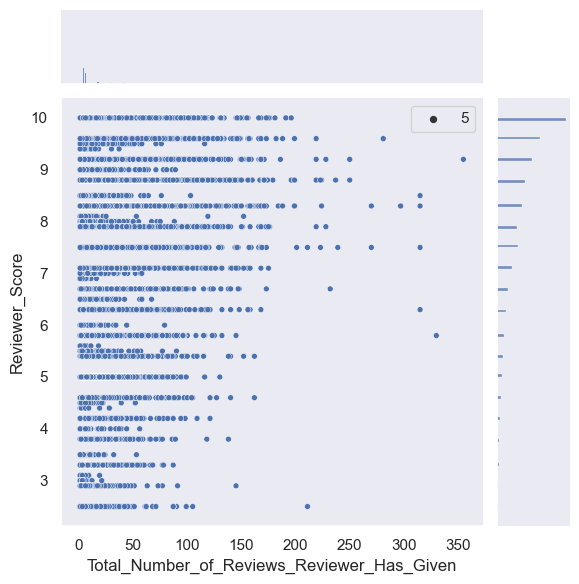

In [38]:
#sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)
sns.jointplot(x="Total_Number_of_Reviews_Reviewer_Has_Given", y="Reviewer_Score", data = data, size=5) 